## generating sample data

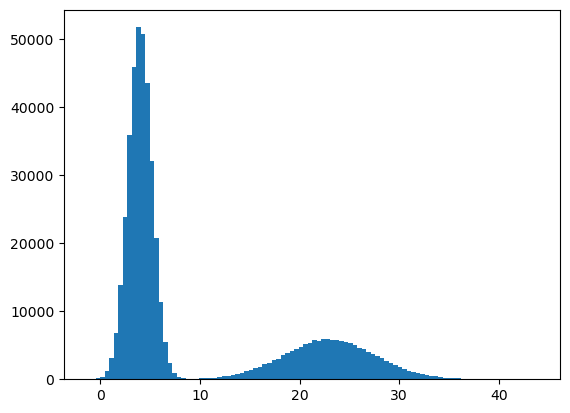

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Mixture components
mu_true = np.array([4, 23])
sigma_true = np.array([1.2, 4.6])

# Determine Z_i
Z = np.random.binomial(1, 0.3, 500000)

# Sample from mixture model
X = np.random.normal(loc=mu_true[Z], scale=sigma_true[Z], size=500000)

# Create a histogram
plt.hist(X, bins=100)
plt.show()


### estimating the multigaussian

In [87]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Define the number of components (in your case, 2 for two Gaussians)
n_components = 2

# Initialize the Gaussian Mixture model
gmm = GaussianMixture(n_components=n_components)

# Fit the model to the data
gmm.fit(X.reshape(-1, 1))  # Reshape data to match GMM input format - uses Expectation-maximization algorithm

# Get the estimated parameters
estimated_means = gmm.means_.flatten()
estimated_variances = gmm.covariances_.flatten()
estimated_weights = gmm.weights_.flatten()

print("Estimated Means:", estimated_means)
print("Estimated Variances:", estimated_variances)
print("Estimated Sigma:", np.sqrt(estimated_variances))
print("Estimated Mixing Coefficients:", estimated_weights)

Estimated Means: [4.72953662 3.26652833]
Estimated Variances: [0.90840388 0.90175775]
Estimated Sigma: [0.95310224 0.94960926]
Estimated Mixing Coefficients: [0.50235959 0.49764041]


### estimating the log liklihood based on the gaussian

In [134]:
# new value of x
x_new = 30

# get estimated parameters of gaussian mixture
weights = estimated_weights
mu = estimated_means
sigma = np.sqrt(estimated_variances)

# caluculate log liklihoods
likelihoods = weights * norm.pdf(x_new, loc=mu, scale=sigma)
likelihood = np.sum(likelihoods)

# surprise
surprise = -np.log(likelihood)

/scratch/jorvhar/50241822.dccn-l029.dccn.nl/ipykernel_19913/2378458390.py:14: RuntimeWarning: divide by zero encountered in log
  surprise = -np.log(likelihood)


## itterate over block and conditions

In [198]:
## predefine settings
n_components = 2    # number of components / nr of gaussians
context_window = 0 # set maximum context window to integrate

# Initialize the Gaussian Mixture model
gmm = GaussianMixture(n_components=n_components)


# for block in df_beh['block'].unique():
#     block_oct_dat = df_beh.loc[df_beh['block'] == block, 'frequencies_oct'].to_numpy()

# fatch block octave data
block_oct_dat = df_beh.loc[df_beh['block'] == 1, 'frequencies_oct'].to_numpy()

# predefine arrays
est_meanz   = np.zeros((2, len(block_oct_dat)))
est_varz    = np.zeros((2, len(block_oct_dat)))
est_sigmaz  = np.zeros((2, len(block_oct_dat)))
est_weightz = np.zeros((2, len(block_oct_dat)))
est_meanz[:] = np.nan
est_varz[:] = np.nan
est_sigmaz[:] = np.nan
est_weightz[:] = np.nan

# set where to start itterating
if context_window < n_components:
    startpoint = n_components
else:
    startpoint = context_window
    
# loop over all the tones
for tone in np.arange(startpoint, len(block_oct_dat)):
    
    # cummalative data
    if context_window == 0:
        cum_data = block_oct_dat[:tone]
    else:
        cum_data = block_oct_dat[tone-context_window:tone]

        
    # Fit the model to the data
    gmm.fit(cum_data.reshape(-1, 1))  # Reshape data to match GMM input format

    # Get the estimated parameters
    estimated_means = gmm.means_.flatten()
    estimated_variances = gmm.covariances_.flatten()
    estimated_sigmas = np.sqrt(estimated_variances)
    estimated_weights = gmm.weights_.flatten()
    
    # sort my mean and get indexes - to always match this sorting
    idx = np.argsort(estimated_means)
    
    # save
    est_meanz[:, tone] = estimated_means[idx]
    est_varz[:, tone] = estimated_variances[idx]
    est_sigmaz[:, tone] = estimated_sigmas[idx]
    est_weightz[:, tone] = estimated_weights[idx]

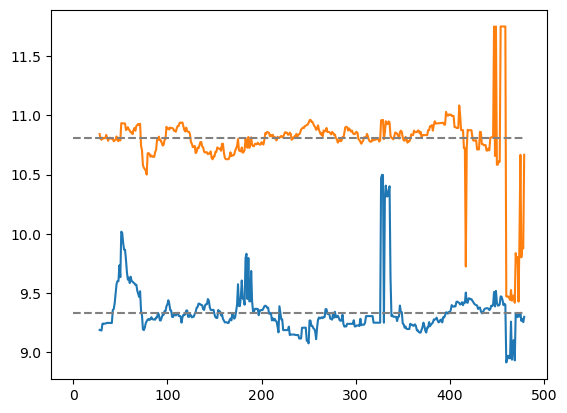

In [195]:
# ideal observer
plt.plot(est_meanz.T)

# real
plt.plot(df_beh.loc[df_beh['block'] == 1, 'center_freq_a_oct'], color='grey', ls='--')
plt.plot(df_beh.loc[df_beh['block'] == 1, 'center_freq_b_oct'], color='grey', ls='--')

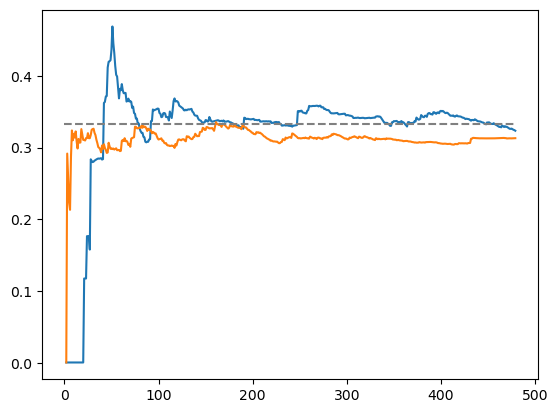

In [199]:
# ideal observer
plt.plot(est_sigmaz.T)

# real
plt.plot(np.ones(len(est_sigmaz.T)) /3, color='grey', ls='--')

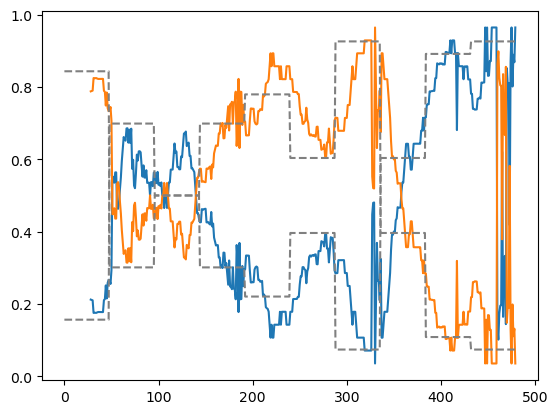

In [197]:
# ideal observer
plt.plot(est_weightz.T)

# real
plt.plot(df_beh.loc[df_beh['block'] == 1, 'probability_a'], color='grey', ls='--')
plt.plot(df_beh.loc[df_beh['block'] == 1, 'probability_b'], color='grey', ls='--')

In [148]:
estimated_means[idx]

array([ 9.32890662, 10.8098285 ])

In [138]:
df_beh.loc[df_beh['block'] == 1]

,frequencies,frequencies_oct,timing,timing_offset,run,block,segment,center_freq_a,center_freq_b,center_freq_a_oct,center_freq_b_oct,probability_a,probability_b,stimulus
0,2435.496172,11.250000,11114.302135,11114.504117,1.0,1.0,1.0,645.854171,1798.010924,9.335065,10.812186,0.156760,0.843240,1
1,1625.498677,10.666667,11114.552135,11114.753804,1.0,1.0,1.0,645.854171,1798.010924,9.335065,10.812186,0.156760,0.843240,2
2,483.263648,8.916667,11114.802135,11115.004156,1.0,1.0,1.0,645.854171,1798.010924,9.335065,10.812186,0.156760,0.843240,3
3,2298.802275,11.166667,11115.052135,11115.254142,1.0,1.0,1.0,645.854171,1798.010924,9.335065,10.812186,0.156760,0.843240,4
4,2048.000000,11.000000,11115.302135,11115.503560,1.0,1.0,1.0,645.854171,1798.010924,9.335065,10.812186,0.156760,0.843240,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,608.874043,9.250000,11233.052135,11233.253768,1.0,1.0,10.0,645.854171,1798.010924,9.335065,10.812186,0.925794,0.074206,476
476,683.438005,9.416667,11233.302135,11233.504109,1.0,1.0,10.0,645.854171,1798.010924,9.335065,10.812186,0.925794,0.074206,477
477,542.445104,9.083333,11233.552135,11233.753824,1.0,1.0,10.0,645.854171,1798.010924,9.335065,10.812186,0.925794,0.074206,478
478,608.874043,9.250000,11233.802135,11234.003956,1.0,1.0,10.0,645.854171,1798.010924,9.335065,10.812186,0.925794,0.074206,479


## check with actual data

In [101]:
# main loading
def data_load(pp,data_dir, stim_dir):
    """load mainpred mat file and stimuli matfile"""
    mat = scipy.io.loadmat(join(data_dir,
                                f'{pp}-mainpred.mat'))
    stimuli = scipy.io.loadmat(join(stim_dir, 
                                    f'{pp}_main_stims.mat'))
    return(mat, stimuli)


def stims_load(mat, stimuli):
    """using information from stimuli and pulse timing create dataframe 
    with frequency information, pulse location etc.
    note: 'volume_rel' & 'vol_abs' are the volume where this stimuli was measured
    'closest_volume_rel' & 'closest_volume_abs' are the volume which is the closest in time
    (half tr shift) - since a tr should capture information within that tr"""

    # set arrays
    freqz   = np.array([])
    timingz  = np.array([])
    timings_offsetz  = np.array([])
    runz     = np.array([])
    blockz   = np.array([])
    segmenz  = np.array([])
    centaz   = np.array([])
    centbz   = np.array([])
    probaz   = np.array([])
    probbz   = np.array([])

    for blk in np.arange(1, mat['timingz'][1].max()+1):
        # get blockidx
        idxblock = np.where(mat['timingz'][1] == blk) # where block is 1

        #get frequency presentation data for block
        frequencies = stimuli['pres_freq'][int(blk)-1, :]

        # other values
        tps = np.sum(mat['timingz'][3, idxblock] == 1) # get trials per secion

        #get timings back from mat file, substract begin time
        timings = mat['timingz'][6, idxblock]
        timings_offset = mat['timingz'][7, idxblock]
        matidx = np.where(mat['segmentz'][1] == blk)

        # append to arrays
        freqz = np.append(freqz, frequencies)
        timingz = np.append(timingz, timings)
        timings_offsetz = np.append(timings_offsetz, timings_offset)
        runz = np.append(runz, np.repeat(mat['segmentz'][0][matidx], tps))
        blockz = np.append(blockz, np.repeat(mat['segmentz'][1][matidx], tps))
        segmenz = np.append(segmenz, np.repeat(mat['segmentz'][2][matidx], tps))
        centaz = np.append(centaz, 2**np.repeat(mat['segmentz'][7][matidx], tps))   # cent freq a
        centbz = np.append(centbz, 2**np.repeat(mat['segmentz'][8][matidx], tps))  # cent freq b
        probaz = np.append(probaz, np.repeat(mat['segmentz'][5][matidx], tps))
        probbz = np.append(probbz, np.repeat(mat['segmentz'][6][matidx], tps))

    # oct variant 
    freqz_oct = np.log2(freqz)
    centaz_oct = np.log2(centaz)
    centbz_oct = np.log2(centbz)

    # put data into a dictionary and subsequentially in a dataframe
    stim_df_dict = {'frequencies': freqz,
                    'frequencies_oct': freqz_oct,
                    'timing': timingz,
                    'timing_offset': timings_offsetz,
                    'run': runz,
                    'block': blockz,
                    'segment': segmenz,
                    'center_freq_a': centaz,
                    'center_freq_b': centbz,
                    'center_freq_a_oct': centaz_oct,
                    'center_freq_b_oct': centbz_oct,
                    'probability_a': probaz,
                    'probability_b': probbz
                   }

    stim_df = pd.DataFrame(stim_df_dict)
    # Add the 'stimulus' column to df_beh
    stim_df['stimulus'] = stim_df.index + 1
    return(stim_df)

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix,  classification_report, log_loss
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm
import scipy.io
import re
import itertools

import os
from os.path import join
import contextlib
from copy import deepcopy
import imp 
import time 
import sys

In [106]:
pp = 10

# set behevioural directiories
stim_dir = f'/project/3018063.01/beh/stimuli/{pp}'
loud_dir = f'/project/3018063.01/beh/loudness/{pp}'
data_dir = f'/project/3018063.01/beh/data/{pp}'


# get mat and stimuli struct
mat, stimuli = data_load(pp, data_dir, stim_dir)

# put in dataframe
df_beh = stims_load(mat, stimuli)

In [108]:
df_beh['frequencies_oct']

0        11.250000
1        10.666667
2         8.916667
3        11.166667
4        11.000000
           ...    
11515    10.833333
11516    10.666667
11517    10.833333
11518    10.250000
11519    10.500000
Name: frequencies_oct, Length: 11520, dtype: float64

In [112]:
for block in df_beh['block'].unique():
    df_beh.loc[df_beh['block'] == block, 'frequencies_oct']

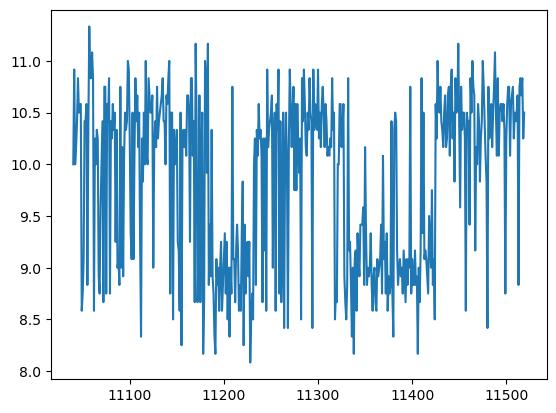

In [114]:
plt.plot(df_beh.loc[df_beh['block'] == block, 'frequencies_oct'])

In [80]:
# Calculate the likelihood of x_new within the Gaussian mixture
likelihoods = weights * norm.pdf(x_new, loc=mu, scale=sigma)
likelihood = np.sum(likelihoods)

print("Likelihood of x_new within the Gaussian mixture:", likelihood)


Likelihood of x_new within the Gaussian mixture: 0.014307122660395449


In [79]:
likelihoods

5.1778082847536205e-20

In [71]:
i = 0
weights[i] * norm.pdf(x_new, loc=mu[i], scale=sigma[i])

0.014307122660395449

In [72]:
i = 1
weights[i] * norm.pdf(x_new, loc=mu[i], scale=sigma[i])

5.1778082847536205e-20

In [77]:
np.sum(weights * (norm.pdf(x_new, loc=mu, scale=sigma)))

0.014307122660395449

In [74]:
weights

array([0.74949589, 0.25050411])

In [75]:
mu_true

array([ 4, 23])

In [54]:
estimated_variances.flatten()

array([4.01751065, 4.45344908])

In [29]:
import numpy as np
from scipy.stats import norm

# New data point
x_new = 4

# Define the mixture components
mu_true = np.array([4, 12])
sigma_true = np.array([1, 1])
weights = np.array([0.25, 0.75])  # Mixing weights

# Calculate the likelihood of the new point under each component
likelihoods = weights * (norm.pdf(x_new, loc=mu_true, scale=sigma_true))

# Calculate the log-likelihood for the new point
log_likelihood = np.log(np.sum(likelihoods))

print("Log-Likelihood for x_new:", log_likelihood)

Log-Likelihood for x_new: -2.3052328943245253


In [30]:
# Exponentiate the log-likelihood to get the likelihood
likelihood = np.exp(log_likelihood)

# Normalize the likelihood to obtain a probability
total_likelihood = np.sum(likelihoods)
probability = likelihood / total_likelihood

In [31]:
probability

1.0

In [32]:
likelihood

0.09973557010036196

In [12]:
log_likelihood

-16191.0219377693

In [14]:
w

[1, 1]